In [1]:
# Parameters
job_id = "24"


#Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns

data = pd.read_csv('src/data/911.csv')
data.count()
data = data.dropna()
len(data)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1


In [3]:
data.describe()

,lat,lng,zip,e
count,583199.000000,583199.000000,583199.000000,583199.0
mean,40.160511,-75.313874,19236.077238,1.0
std,0.109280,0.603885,298.188280,0.0
min,22.986757,-95.595595,1104.000000,1.0
25%,40.102500,-75.399590,19038.000000,1.0
50%,40.145223,-75.302575,19401.000000,1.0
75%,40.232145,-75.207070,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [4]:
data["zip"].nunique()

200

In [5]:
data.describe(include=["object"])

,desc,title,timeStamp,twp,addr
count,583199,583199,583199,583199,583199
unique,582993,144,566959,68,38059
top,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,Traffic: VEHICLE ACCIDENT -,2018-07-09 13:23:16,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD
freq,5,125113,8,47487,7285


In [6]:
print('Rows     :',data.shape[0])
print('Columns  :',data.shape[1])

Rows     : 583199
Columns  : 9


In [7]:
print(data.columns.values)

['lat' 'lng' 'desc' 'zip' 'title' 'timeStamp' 'twp' 'addr' 'e']


In [8]:
data = data.drop('e',axis=1)

In [9]:
# missing values
print('Missing values:',data.isnull().values.sum())

data.isnull().sum()

Missing values: 0


lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583199 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        583199 non-null  float64
 1   lng        583199 non-null  float64
 2   desc       583199 non-null  object 
 3   zip        583199 non-null  float64
 4   title      583199 non-null  object 
 5   timeStamp  583199 non-null  object 
 6   twp        583199 non-null  object 
 7   addr       583199 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.0+ MB


In [11]:
data['zip'].nunique()

200

In [12]:
data_zip = pd.DataFrame(data['zip'].value_counts().head(5))
data_zip.rename(columns = {'zip':'Top 5'}, inplace = True)
data_zip.style.background_gradient(cmap='Blues')

,count
zip,
19401.000000,45596
19464.000000,43902
19403.000000,34888
19446.000000,32268
19406.000000,22456


In [13]:
data_twp = pd.DataFrame(data['twp'].value_counts().head(5))
data_twp.rename(columns = {'twp':'Top 5'}, inplace = True)
data_twp.style.background_gradient(cmap='Greens')

,count
twp,
LOWER MERION,47487
ABINGTON,38137
NORRISTOWN,35881
POTTSTOWN,26837
CHELTENHAM,26647


In [14]:
data['title'].nunique()

144

In [15]:
data['reason'] = data['title'].apply(lambda title: title.split(':')[0])

In [16]:
data['title_code'] = data['title'].apply(lambda title: title.split(':')[1])

In [17]:
data["weekday"] = pd.to_datetime(data['timeStamp']).dt.day_name()

In [18]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,title_code,weekday
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Thursday
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,Thursday


In [19]:
data_class = data

In [20]:
data.describe(include=["object"])

,desc,title,timeStamp,twp,addr,reason,title_code,weekday
count,583199,583199,583199,583199,583199,583199,583199,583199
unique,582993,144,566959,68,38059,3,93,7
top,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,Traffic: VEHICLE ACCIDENT -,2018-07-09 13:23:16,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,EMS,VEHICLE ACCIDENT -,Friday
freq,5,125113,8,47487,7285,304785,125113,90328


# Remove Outliers

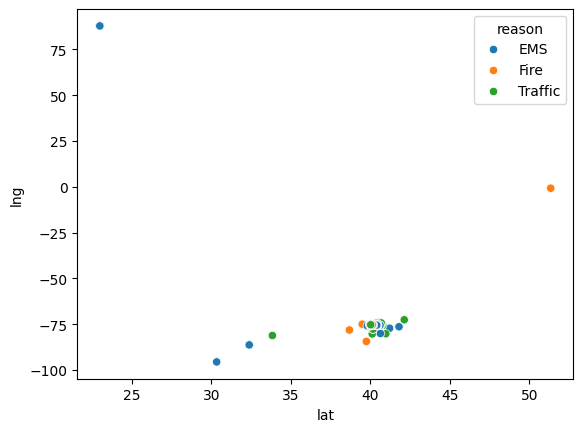

In [21]:
import seaborn as sns

sns.scatterplot(x=data['lat'],y=data['lng'], hue=data['reason']);

In [22]:
data = data[(data["lat"] > 39.5) & (data["lat"] <41.0) ]
data = data[(data["lng"] > -77.0)]

In [23]:
import os

sns.scatterplot(x=data['lat'],y=data['lng'], hue=data['reason']);

images_dir = f"src/output/{job_id}/images"
os.makedirs(images_dir, exist_ok=True)
results_dir = f"src/output/{job_id}/results"
os.makedirs(results_dir, exist_ok=True)

plt.savefig(f"{images_dir}/1.png", bbox_inches='tight')
plt.close()

In [24]:
data = data[data["lng"] > -77]
data = data[data["lng"] < -25]

# Visualizations

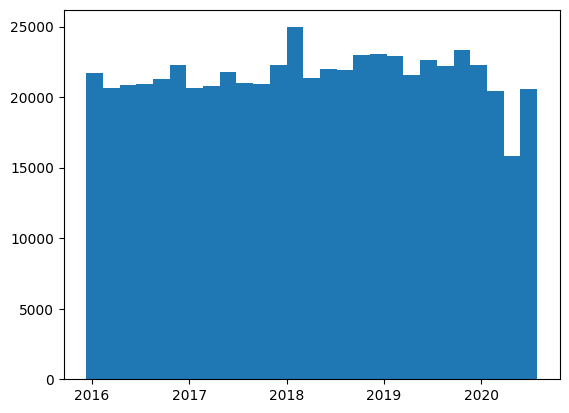

In [25]:
# Histogram by half year
import datetime as dt

plt.hist(pd.to_datetime(data['timeStamp']).dt.date, bins = 27);

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

sns.countplot(x='reason', data=data, order=data['reason'].value_counts().index, ax=axes[0])
axes[0].set_title('Common Reasons for 911 Calls', size=13)
axes[0].set(xlabel='Reason', ylabel='Count')

data['reason'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1])
axes[1].set(xlabel='', ylabel='')

sns.despine(bottom=False, left=True)
plt.savefig(f"{images_dir}/2.png", bbox_inches='tight')

plt.close()

In [27]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='title', data=data, order=data['title'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Count of Descriptions for 911 Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()
# Save the figure
plt.savefig(f"{images_dir}/3.png", bbox_inches='tight')

# Close the plot to free memory (especially in scripts or notebooks)
plt.close()

/var/folders/bz/hpwswv1n2_vcxmwy86j2htkm0000gn/T/ipykernel_27534/1568977134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='title', data=data, order=data['title'].value_counts().index, palette='prism')


In [28]:
data[data['reason']=='Traffic'].groupby('title_code').count()['lat'].sort_values(ascending=True).plot(kind='barh', figsize=(10, 5), color='darkblue')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Traffic 911 Emergency Calls', fontsize=15)
plt.savefig(f"{images_dir}/4.png", bbox_inches='tight')
plt.close()

In [29]:
data[data['reason']=='Fire'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkred')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Fire 911 Emergency Calls', fontsize=15)
plt.savefig(f"{images_dir}/5.png", bbox_inches='tight')
plt.close()

In [30]:
data[data['reason']=='EMS'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkgreen')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('EMS 911 Emergency Calls', fontsize=15)
plt.savefig(f"{images_dir}/6.png", bbox_inches='tight')
plt.close()

# Sample Maps

In [31]:
#import folium

In [32]:
# Create and center Folium map
#folium_map = folium.Map(location=[40.102500,	-75.399590],
                        #tiles="OpenStreetMap")

# Plot Points
#for index, row in data.iterrows():
#    radius_len = 1

#    folium.CircleMarker(location = (row['lat'],
#                                   row['lng']),
#                      radius = radius_len,
#                       fill = True).add_to(folium_map)

#folium_map


In [33]:
#from folium import plugins
#from folium.plugins import HeatMap

In [34]:
#map_hooray = folium.Map(location=[40.102500,	-75.399590],)

#heat_df = data.head(10000) # Reducing data size so it runs faster
#heat_df = heat_df[['lat', 'lng']]

# List comprehension to make out list of lists
#heat_data = [[row['lat'],row['lng']] for index, row in heat_df.iterrows()]

# Plot it on the map
#HeatMap(heat_data).add_to(map_hooray)

# Display the map
#map_hooray

In [35]:
#map_hooray = folium.Map(location=[40.102500,	-75.399590],)

# Plot Points
#for index, row in data.head(50000).iterrows():
#    radius_len = 1

    # color = row["property_type"]
#    if row["reason"] == "EMS":
#        color = ["red"]
#    elif row["reason"] == "Fire":
#        color = ["blue"]
#    elif row["reason"] == "Traffic":
#        color = ["green"]

#    folium.CircleMarker(location = (row['lat'],
#                                   row['lng']),
#                       radius = radius_len,
#                       color = color,
#                       fill = True).add_to(folium_map)

#folium_map


# Feature Engineering (Longitude, Latitude)

Lat Long

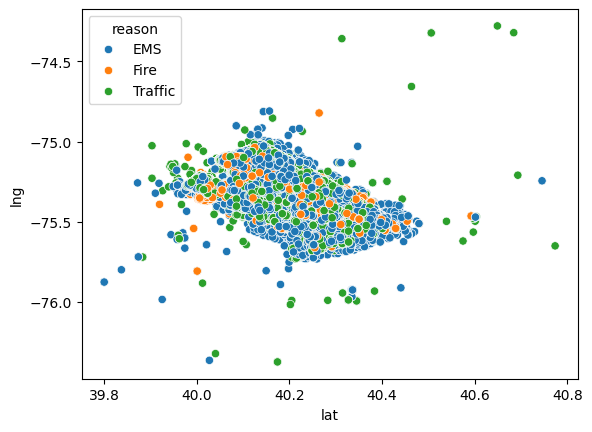

In [36]:
# Plot data
sns.scatterplot(x=data['lat'],y=data['lng'], hue=data['reason']);

In [37]:
import sklearn.cluster
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data[["lat","lng"]])
    Sum_of_squared_distances.append(km.inertia_)

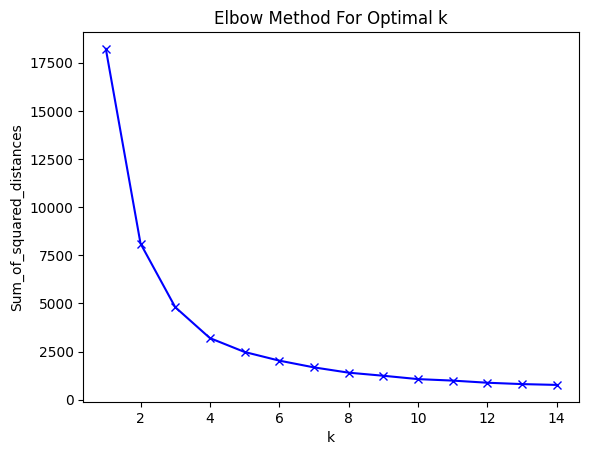

In [38]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
# Select K = 5
km = KMeans(n_clusters= 5)
km.fit(data[["lat","lng"]])
clusters = km.predict(data[["lat","lng"]])

In [40]:
data["cluster"] = pd.Series(clusters, index=data.index)


In [41]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,title_code,weekday,cluster
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Thursday,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Thursday,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Thursday,0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Thursday,0
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,Thursday,3


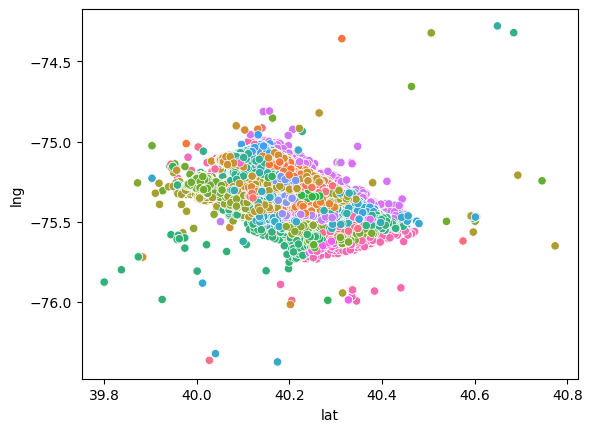

In [42]:
sns.scatterplot(x=data['lat'],y=data['lng'], hue=data['twp'], legend=False);

In [43]:
# Plot clusters
sns.scatterplot(x=data['lat'],y=data['lng'], hue=data['cluster']);
plt.savefig(f"{images_dir}/7.png", bbox_inches='tight')
plt.close()

#Time of Day

In [44]:
data["time"] = data['timeStamp'].str[-8:]

In [45]:
data['secs_into_day'] = (pd.to_datetime(data['timeStamp']) - pd.to_datetime(data['timeStamp']).dt.floor('d')).dt.total_seconds()

In [46]:
data['secs_into_day']

0         61852.0
1         62961.0
2         52761.0
3         60456.0
5         56344.0
           ...   
663517    56811.0
663518    57139.0
663519    57172.0
663520    57248.0
663521    57166.0
Name: secs_into_day, Length: 583163, dtype: float64

In [47]:
time_hist = plt.hist(data['secs_into_day'], bins=96);
time_hist_pts = np.array(data['secs_into_day'].to_list())
plt.xlabel('Seconds into Day')
plt.ylabel('Calls per 15 minute intervals')
plt.title('Total count of Calls by Time')
time_hist;
np.argmax(time_hist_pts[:-1] - time_hist_pts[1:])
plt.savefig(f"{images_dir}/8.png", bbox_inches='tight')
plt.close()

In [48]:
def max_difference_to_neighbors(numbers):
    max_difference = 0
    max_difference_index = None
    for i in range(1, len(numbers) - 1):
        difference_left = abs(numbers[i] - numbers[i-1])
        difference_right = abs(numbers[i] - numbers[i+1])
        if difference_left > max_difference and difference_left > difference_right:
            max_difference = difference_left
            max_difference_index = i
        elif difference_right > max_difference and difference_right > difference_left:
            max_difference = difference_right
            max_difference_index = i
    return max_difference_index, max_difference

In [49]:
max_difference_to_neighbors(time_hist_pts)

(451500, np.float64(86383.0))

In [50]:
# seconnds into day to make first split
secs = 86400/96*28
str(dt.timedelta(seconds=secs))

# Therfore shift times to 7am

'7:00:00'

In [51]:
threshold = secs
increment = 86400

# Update column secs_into_day if the value is less than the 7am
data['secs_into_day'] = data['secs_into_day'].apply(lambda x: x + increment if x < threshold else x)


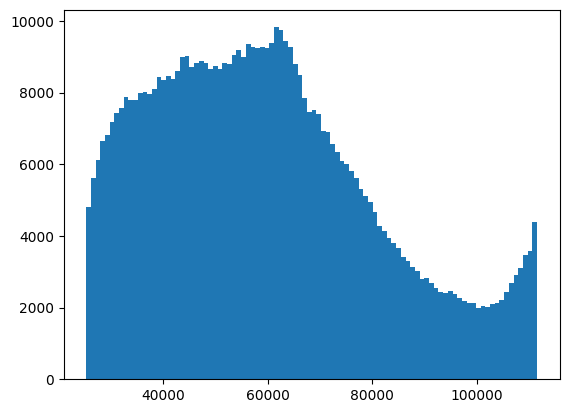

In [52]:
time_hist = plt.hist(data['secs_into_day'], bins=96);

In [53]:
import sklearn.cluster
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data["secs_into_day"].values.reshape(-1, 1))
    Sum_of_squared_distances.append(km.inertia_)

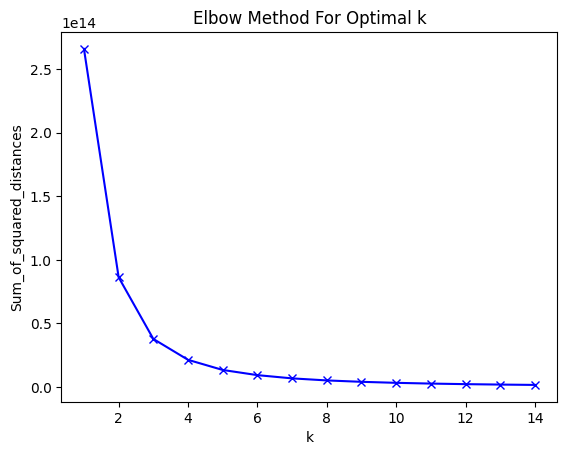

In [54]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
# Select K = 4
km = KMeans(n_clusters= 4)
km.fit(data[["secs_into_day"]])
clusters_day = km.predict(data[["secs_into_day"]])

In [56]:
data["cluster_time"] = clusters_day

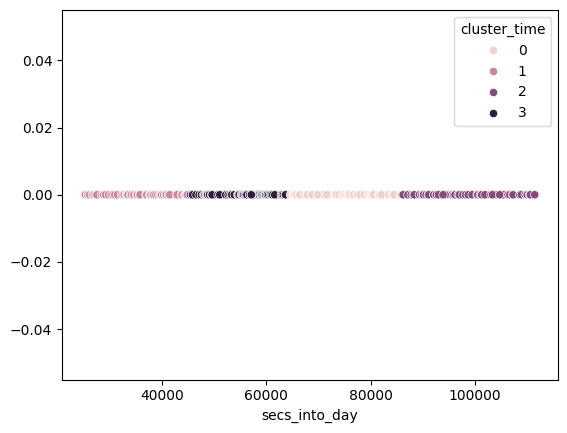

In [57]:
sns.scatterplot(x=data['secs_into_day'],y=0, hue=data['cluster_time']);

In [58]:
from sklearn import cluster
print("time cluster 0: ~6pm-12am midnight")
print(dt.timedelta(seconds = data[data["cluster_time"] == 0]["secs_into_day"].min()))
print(dt.timedelta(seconds = data[data["cluster_time"] == 0]["secs_into_day"].max()))

print("time cluster 1: 7am-1pm")
print(dt.timedelta(seconds = data[data["cluster_time"] == 1]["secs_into_day"].min()))
print(dt.timedelta(seconds = data[data["cluster_time"] == 1]["secs_into_day"].max()))

print("time cluster 2: 12am midnight -7am")
print(dt.timedelta(seconds = data[data["cluster_time"] == 2]["secs_into_day"].min()))
print(dt.timedelta(seconds = data[data["cluster_time"] == 2]["secs_into_day"].max()))

print("time cluster 3: 1pm-6pm")
print(dt.timedelta(seconds = data[data["cluster_time"] == 3]["secs_into_day"].min()))
print(dt.timedelta(seconds = data[data["cluster_time"] == 3]["secs_into_day"].max()))

dt.timedelta(seconds = data[data["cluster_time"] == 0]["secs_into_day"].max()) - dt.timedelta(seconds = data[data["cluster_time"] == 0]["secs_into_day"].min())

time cluster 0: ~6pm-12am midnight


17:45:26
23:54:38
time cluster 1: 7am-1pm
7:00:00
12:35:15
time cluster 2: 12am midnight -7am
23:54:39
1 day, 6:59:59
time cluster 3: 1pm-6pm
12:35:16
17:45:25


datetime.timedelta(seconds=22152)

In [59]:
data["cluster_time"] = data['cluster_time'].map({0:'evening', 1:'morning', 2: 'midnight', 3: 'afternoon'})
data.groupby('cluster_time').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkgreen')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('EMS 911 Emergency Calls', fontsize=15)
plt.savefig(f"{images_dir}/9.png", bbox_inches='tight')
plt.close()

#Method 2:

#ECLAT ASSOCIATION RULE

In [60]:
data["cluster"]

0         1
1         3
2         0
3         0
5         3
         ..
663517    0
663518    0
663519    0
663520    0
663521    0
Name: cluster, Length: 583163, dtype: int32

In [61]:
test = data[["reason", "weekday","cluster", "cluster_time"]].applymap(str)
test1 = test.values.tolist()
test1

test2 = pd.DataFrame(test1)
test2

/var/folders/bz/hpwswv1n2_vcxmwy86j2htkm0000gn/T/ipykernel_27534/3123675670.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test = data[["reason", "weekday","cluster", "cluster_time"]].applymap(str)


,0,1,2,3
0,EMS,Thursday,1,afternoon
1,EMS,Thursday,3,afternoon
2,Fire,Thursday,0,afternoon
3,EMS,Thursday,0,afternoon
4,EMS,Thursday,3,afternoon
...,...,...,...,...
583158,Traffic,Wednesday,0,afternoon
583159,EMS,Wednesday,0,afternoon
583160,EMS,Wednesday,0,afternoon
583161,Fire,Wednesday,0,afternoon


In [62]:
# we are looking for itemSETS
# we do not want to have any individual products returned
min_n_products = 2

# we want to set min support to 7
# but we have to express it as a percentage
min_support = 0.01

# we have no limit on the size of association rules
# so we set it to the longest transaction
max_length = max([len(x) for x in test1])

In [63]:
from pyECLAT import ECLAT
import json

# create an instance of eclat
my_eclat = ECLAT(data=test2, verbose=True)

# fit the algorithm
rule_indices, rule_supports = my_eclat.fit(min_support=min_support,
                                           min_combination=min_n_products,
                                           max_combination=max_length)
with open(f"{results_dir}/eclat.json", 'w') as json_file:
    json.dump(rule_supports, json_file)

  0%|          | 0/19 [00:00<?, ?it/s]

 11%|█         | 2/19 [00:00<00:01, 12.95it/s]

 21%|██        | 4/19 [00:00<00:01, 14.35it/s]

 32%|███▏      | 6/19 [00:00<00:00, 13.45it/s]

 42%|████▏     | 8/19 [00:00<00:00, 13.78it/s]

 53%|█████▎    | 10/19 [00:00<00:00, 14.28it/s]

 63%|██████▎   | 12/19 [00:00<00:00, 14.27it/s]

 74%|███████▎  | 14/19 [00:00<00:00, 14.24it/s]

 84%|████████▍ | 16/19 [00:01<00:00, 13.31it/s]

 95%|█████████▍| 18/19 [00:01<00:00, 13.31it/s]

100%|██████████| 19/19 [00:01<00:00, 13.66it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

 68%|██████▊   | 13/19 [00:00<00:00, 121.67it/s]

100%|██████████| 19/19 [00:00<00:00, 121.65it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

 79%|███████▉  | 15/19 [00:00<00:00, 126.30it/s]

100%|██████████| 19/19 [00:00<00:00, 122.00it/s]

Combination 2 by 2


0it [00:00, ?it/s]

10it [00:00, 96.42it/s]

20it [00:00, 95.75it/s]

34it [00:00, 115.15it/s]

47it [00:00, 115.29it/s]

60it [00:00, 117.74it/s]

72it [00:00, 107.40it/s]

83it [00:00, 91.20it/s] 

93it [00:00, 86.49it/s]

106it [00:01, 96.86it/s]

117it [00:01, 97.98it/s]

130it [00:01, 106.51it/s]

142it [00:01, 109.66it/s]

154it [00:01, 100.32it/s]

165it [00:01, 102.16it/s]

171it [00:01, 99.01it/s] 

Combination 3 by 3


0it [00:00, ?it/s]

27it [00:00, 267.06it/s]

60it [00:00, 299.57it/s]

90it [00:00, 174.11it/s]

112it [00:00, 185.13it/s]

134it [00:00, 193.16it/s]

160it [00:00, 211.42it/s]

191it [00:00, 238.33it/s]

217it [00:00, 241.05it/s]

254it [00:01, 278.39it/s]

283it [00:01, 272.26it/s]

313it [00:01, 277.49it/s]

342it [00:01, 266.92it/s]

370it [00:01, 230.51it/s]

395it [00:01, 164.74it/s]

415it [00:02, 127.34it/s]

431it [00:02, 130.57it/s]

452it [00:02, 146.07it/s]

472it [00:02, 156.45it/s]

490it [00:02, 157.75it/s]

508it [00:02, 146.44it/s]

524it [00:02, 118.19it/s]

538it [00:03, 113.66it/s]

551it [00:03, 105.37it/s]

563it [00:03, 101.17it/s]

574it [00:03, 100.49it/s]

595it [00:03, 125.93it/s]

617it [00:03, 148.58it/s]

647it [00:03, 188.61it/s]

671it [00:03, 202.70it/s]

704it [00:03, 238.04it/s]

737it [00:04, 263.58it/s]

769it [00:04, 278.52it/s]

804it [00:04, 299.29it/s]

836it [00:04, 303.53it/s]

867it [00:04, 279.62it/s]

896it [00:04, 274.63it/s]

925it [00:04, 278.58it/s]

954it [00:04, 260.31it/s]

969it [00:04, 197.47it/s]

Combination 4 by 4


0it [00:00, ?it/s]

34it [00:00, 306.72it/s]

68it [00:00, 321.02it/s]

101it [00:00, 209.87it/s]

131it [00:00, 235.21it/s]

158it [00:00, 200.90it/s]

181it [00:00, 189.83it/s]

202it [00:00, 193.13it/s]

227it [00:01, 206.65it/s]

249it [00:01, 184.15it/s]

271it [00:01, 192.99it/s]

302it [00:01, 223.20it/s]

338it [00:01, 257.70it/s]

365it [00:01, 253.16it/s]

392it [00:01, 250.20it/s]

418it [00:01, 250.80it/s]

446it [00:01, 258.75it/s]

481it [00:02, 284.14it/s]

517it [00:02, 305.81it/s]

558it [00:02, 335.65it/s]

596it [00:02, 348.07it/s]

637it [00:02, 364.66it/s]

678it [00:02, 377.42it/s]

721it [00:02, 390.65it/s]

764it [00:02, 399.76it/s]

808it [00:02, 409.98it/s]

850it [00:02, 397.43it/s]

895it [00:03, 410.86it/s]

937it [00:03, 410.90it/s]

981it [00:03, 419.01it/s]

1025it [00:03, 422.87it/s]

1068it [00:03, 424.33it/s]

1113it [00:03, 431.30it/s]

1157it [00:03, 425.30it/s]

1202it [00:03, 429.77it/s]

1246it [00:03, 431.60it/s]

1291it [00:03, 436.82it/s]

1335it [00:04, 436.90it/s]

1379it [00:04, 395.79it/s]

1420it [00:04, 367.67it/s]

1459it [00:04, 373.21it/s]

1499it [00:04, 379.88it/s]

1542it [00:04, 391.59it/s]

1586it [00:04, 403.79it/s]

1627it [00:04, 401.11it/s]

1668it [00:04, 400.73it/s]

1711it [00:05, 406.21it/s]

1752it [00:05, 379.86it/s]

1791it [00:05, 340.75it/s]

1827it [00:05, 345.12it/s]

1863it [00:05, 343.87it/s]

1898it [00:05, 329.24it/s]

1939it [00:05, 349.73it/s]

1981it [00:05, 367.50it/s]

2023it [00:05, 380.70it/s]

2063it [00:06, 385.54it/s]

2103it [00:06, 388.48it/s]

2143it [00:06, 382.71it/s]

2182it [00:06, 356.33it/s]

2221it [00:06, 363.53it/s]

2262it [00:06, 376.17it/s]

2304it [00:06, 386.40it/s]

2343it [00:06, 341.75it/s]

2379it [00:06, 338.77it/s]

2419it [00:07, 354.75it/s]

2458it [00:07, 364.04it/s]

2497it [00:07, 369.80it/s]

2535it [00:07, 371.86it/s]

2573it [00:07, 372.39it/s]

2614it [00:07, 382.79it/s]

2655it [00:07, 389.26it/s]

2696it [00:07, 393.46it/s]

2736it [00:07, 391.75it/s]

2776it [00:07, 393.48it/s]

2817it [00:08, 397.22it/s]

2857it [00:08, 396.32it/s]

2897it [00:08, 391.00it/s]

2937it [00:08, 392.82it/s]

2978it [00:08, 397.44it/s]

3022it [00:08, 408.75it/s]

3063it [00:08, 407.58it/s]

3106it [00:08, 412.28it/s]

3148it [00:08, 413.88it/s]

3190it [00:08, 401.38it/s]

3231it [00:09, 385.52it/s]

3270it [00:09, 374.12it/s]

3308it [00:09, 349.25it/s]

3344it [00:09, 346.59it/s]

3379it [00:09, 341.30it/s]

3414it [00:09, 327.01it/s]

3447it [00:09, 323.83it/s]

3482it [00:09, 330.02it/s]

3516it [00:09, 330.33it/s]

3550it [00:10, 321.09it/s]

3583it [00:10, 315.61it/s]

3617it [00:10, 320.19it/s]

3650it [00:10, 314.74it/s]

3688it [00:10, 333.06it/s]

3727it [00:10, 346.60it/s]

3769it [00:10, 366.28it/s]

3813it [00:10, 387.25it/s]

3852it [00:10, 384.02it/s]

3876it [00:10, 352.56it/s]

In [64]:
print(rule_supports)

{'morning & Friday': 0.04468047527020747, 'morning & Saturday': 0.03596421583673862, 'morning & 1': 0.02690156954402114, 'morning & 0': 0.10002863693341313, 'morning & Tuesday': 0.045249784365606185, 'morning & 4': 0.0365746798065035, 'morning & Sunday': 0.031341151616271955, 'morning & Wednesday': 0.04562875216706135, 'morning & Thursday': 0.04475078151391635, 'morning & 3': 0.049330976073584915, 'morning & Fire': 0.04202941544645322, 'morning & EMS': 0.15461886299370844, 'morning & Traffic': 0.09678769057707708, 'morning & Monday': 0.045820808247436826, 'morning & 2': 0.08060010665971606, 'Friday & 1': 0.014824328703981563, 'Friday & afternoon': 0.05146931475419394, 'Friday & 0': 0.05273825671381758, 'Friday & 4': 0.019188460173227725, 'Friday & 3': 0.02570293382810638, 'Friday & evening': 0.040194593964294714, 'Friday & Fire': 0.023134183753084472, 'Friday & EMS': 0.07719454080591533, 'Friday & Traffic': 0.05455764511808877, 'Friday & 2': 0.042432390257955324, 'Friday & midnight': 0

#APRIORI

In [65]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# List of transactions
transactions = test1

# Convert transactions to a one-hot encoded array
te = TransactionEncoder()
onehot = te.fit_transform(transactions)

# Convert one-hot encoded array to a pandas DataFrame
df = pd.DataFrame(onehot, columns=te.columns_)

# Find frequent itemsets with minimum support of 0.3
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules with minimum lift of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


rules_list = []

for index, row in rules.iterrows():
    rule = {
        "antecedents": list(row['antecedents']),
        "consequents": list(row['consequents']),
        "support": row["support"],
        "confidence": row["confidence"],
        "lift": row["lift"]
    }
    rules_list.append(rule)

# Save to JSON
output_path = f"{results_dir}/apriori_rules.json"
with open(output_path, "w") as f:
    json.dump(rules_list, f, indent=4)

#FP GROWTH

In [66]:
from fpgrowth_py import fpgrowth

In [67]:
freqItemSet, rules = fpgrowth(test1, minSupRatio=0.01, minConf=0.03)
len(rules)

1161

In [68]:
rules_dict = []
for rule in rules:
    rule_dict = {
        "antecedents": list(rule[0]),
        "consequents": list(rule[1]),
        "support": rule[2]
    }
    rules_dict.append(rule_dict)

# Write to JSON
with open(f"{results_dir}/fpgrowth.json", 'w') as json_file:
    json.dump(rules_dict, json_file, indent=4)